In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data_sample_2 = pd.read_csv('data.csv',',', index_col=['date'], parse_dates=['date'], dayfirst=True)
data_sample_2.head()

/var/folders/bh/08qpbz1j24sfjf29hzvdnyq80000gn/T/ipykernel_61927/4263832154.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data_sample_2 = pd.read_csv('data.csv',',', index_col=['date'], parse_dates=['date'], dayfirst=True)


,host,searches
date,,
2016-01-01,iOS,23833
2016-01-01,mobile_web,8708
2016-01-02,Android,1
2016-01-02,iOS,25793
2016-01-02,mobile_web,9012


# iOS Анализ

In [3]:
data_sample_iOS = data_sample_2[data_sample_2["host"] == 'iOS']

<AxesSubplot: xlabel='date'>

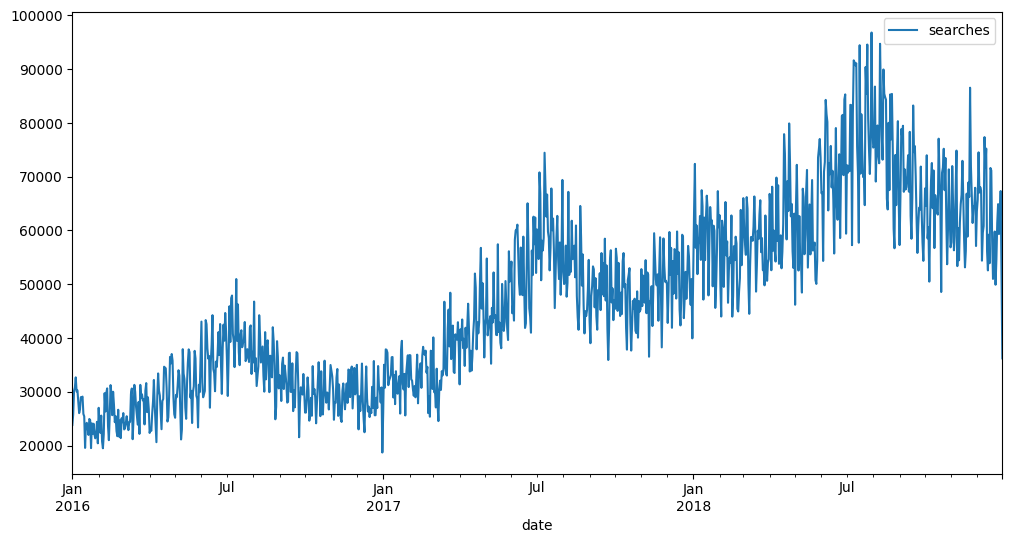

In [4]:
data_sample_iOS.plot(figsize=(12,6))

In [5]:
data_sample_iOS = data_sample_iOS.resample('W').sum()

/var/folders/bh/08qpbz1j24sfjf29hzvdnyq80000gn/T/ipykernel_61927/1206204097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_iOS = data_sample_iOS.resample('W').sum()


<AxesSubplot: xlabel='date'>

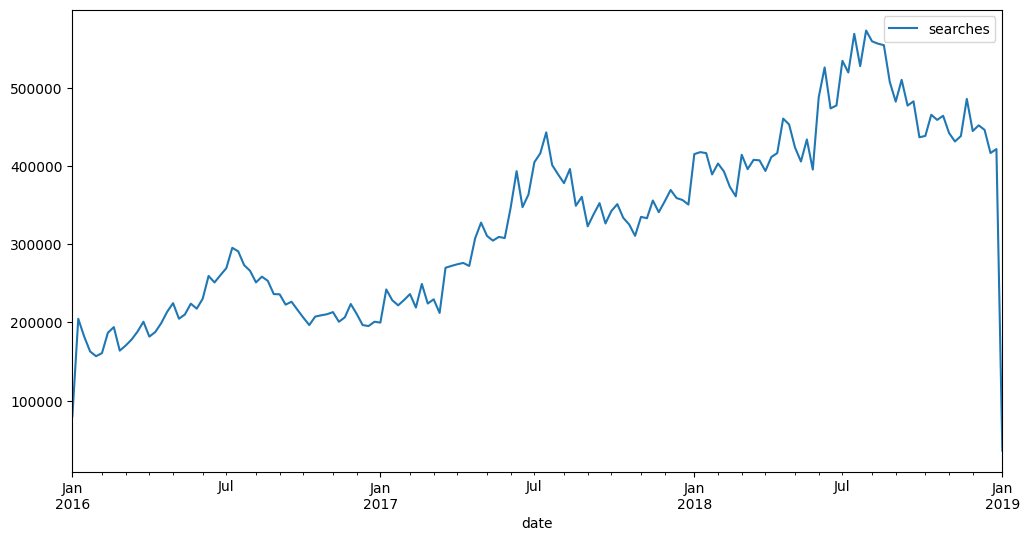

In [6]:
data_sample_iOS.plot(figsize=(12,6))

In [7]:
data_sample_iOS = data_sample_iOS['2016-01-10':'2018-12-30']

<AxesSubplot: xlabel='date'>

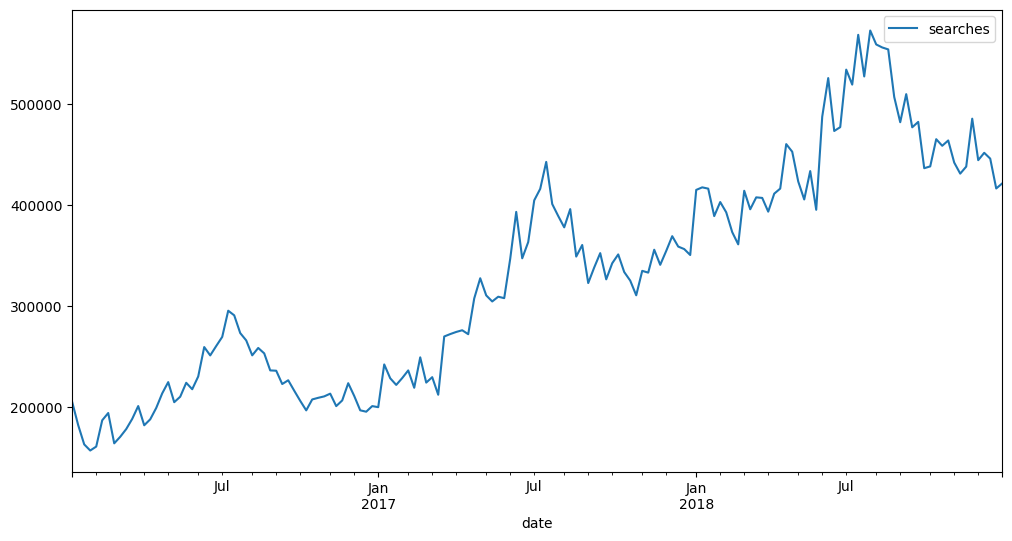

In [8]:
data_sample_iOS.plot(figsize=(12,6))

In [9]:
data_sample_iOS1diff = data_sample_iOS.diff(periods=1).dropna()

,searches
count,156.000000
mean,330084.333333
std,110004.089791
min,156778.000000
25%,224046.750000
50%,333378.000000
75%,416173.250000
max,573028.000000


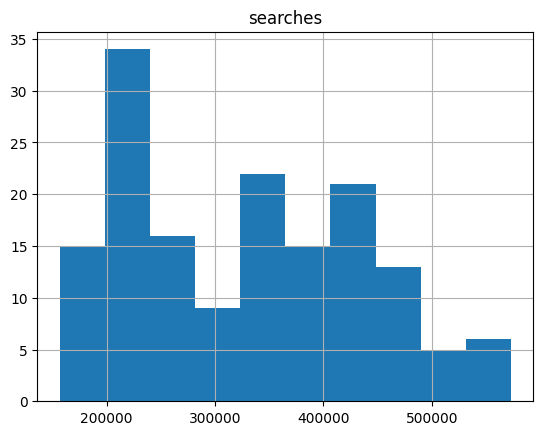

In [10]:
itog = data_sample_iOS.describe()
data_sample_iOS.hist()
itog

In [11]:
test = sm.tsa.adfuller(data_sample_iOS1diff)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.831440664843957
p-value:  0.002601529100443675
Critical values:  {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}
единичных корней нет, ряд стационарен


In [12]:
m = data_sample_iOS1diff.index[len(data_sample_iOS1diff.index)//2+1]
r1 = sm.stats.DescrStatsW(data_sample_iOS1diff[m:])
r2 = sm.stats.DescrStatsW(data_sample_iOS1diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  [0.44275265]


In [13]:
data_sample_iOS1diff.index[len(data_sample_iOS1diff.index)//2+1]

Timestamp('2017-07-16 00:00:00', freq='W-SUN')

<AxesSubplot: xlabel='date'>

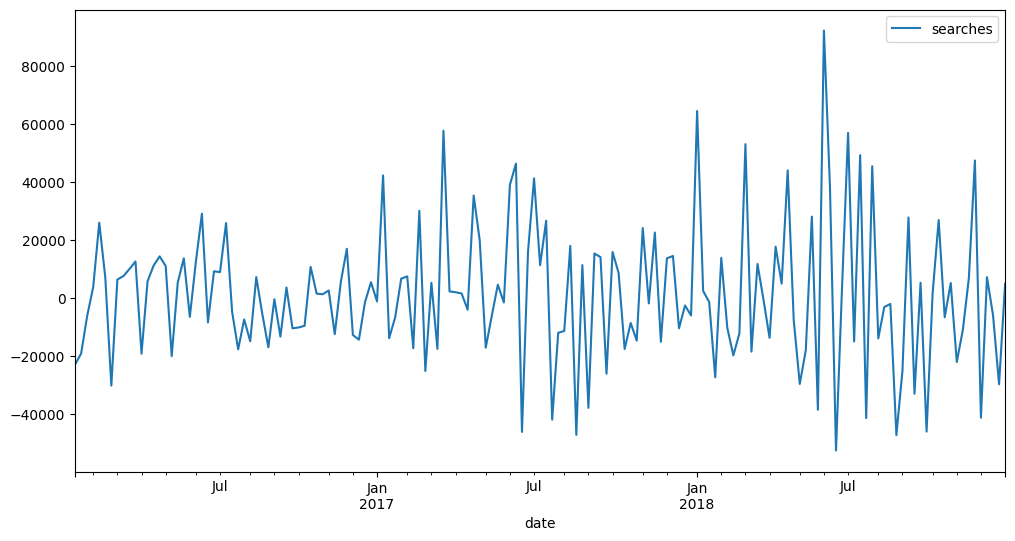

In [14]:
data_sample_iOS1diff.plot(figsize=(12,6))

/Users/viktoriagolovneva/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


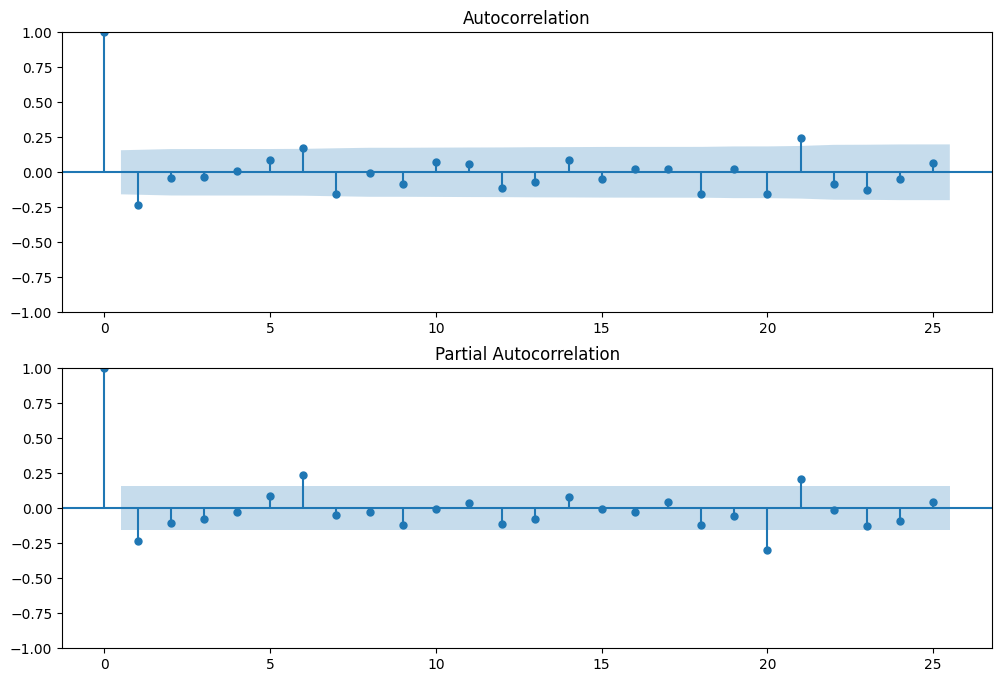

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_sample_iOS1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_sample_iOS1diff, lags=25, ax=ax2)

In [16]:
src_data_model = data_sample_iOS[:'2018-12-01']

In [17]:
model = sm.tsa.ARIMA(src_data_model, order=(1,2,1), freq='W').fit()

In [18]:
print (model.summary())

                               SARIMAX Results                                
Dep. Variable:               searches   No. Observations:                  151
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1723.619
Date:                Sat, 17 Dec 2022   AIC                           3453.238
Time:                        21:39:38   BIC                           3462.250
Sample:                    01-10-2016   HQIC                          3456.900
                         - 11-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0273      0.062     -0.444      0.657      -0.148       0.093
ma.L1         -0.9948      0.069    -14.450      0.000      -1.130      -0.860
sigma2      7.172e+08   4.73e-11   1.52e+19      0.0

In [19]:
pred = model.predict('2018-12-01','2019-12-31', typ='levels')

<AxesSubplot: xlabel='date'>

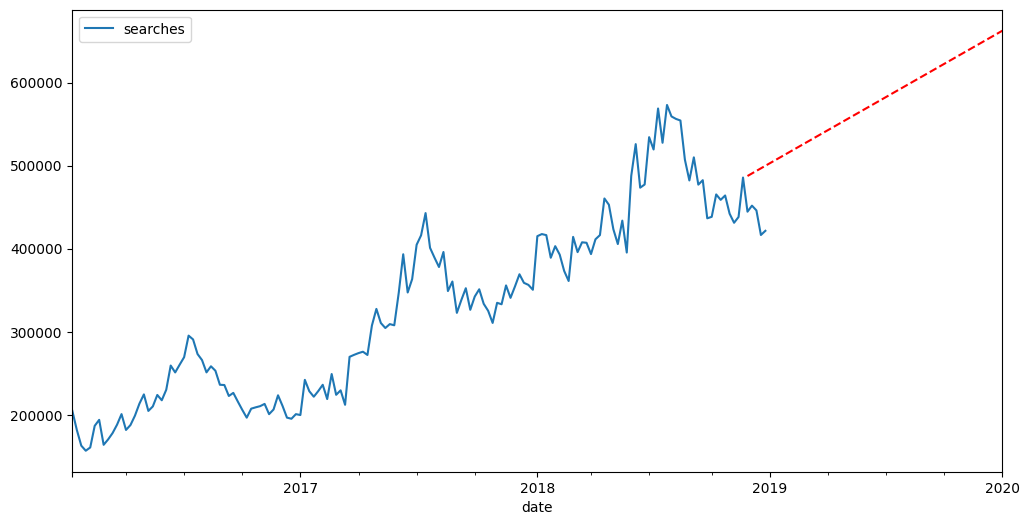

In [20]:
data_sample_iOS.plot(figsize=(12,6))
pred.plot(style='r--')

# Android анализ

In [21]:
data_sample_Android = data_sample_2[data_sample_2["host"] == 'Android']

<AxesSubplot: xlabel='date'>

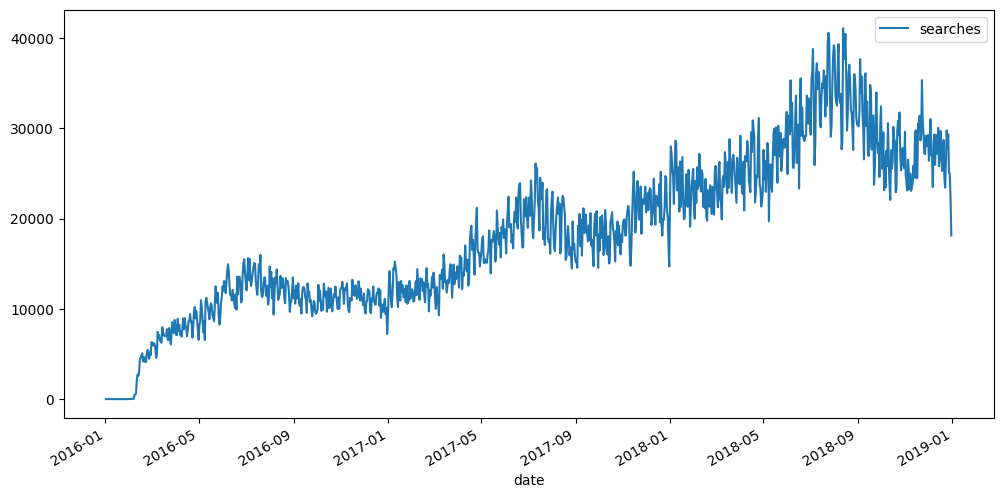

In [22]:
data_sample_Android.plot(figsize=(12,6))

In [23]:
data_sample_Android = data_sample_Android.resample('W').sum()

/var/folders/bh/08qpbz1j24sfjf29hzvdnyq80000gn/T/ipykernel_61927/96346345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_Android = data_sample_Android.resample('W').sum()


<AxesSubplot: xlabel='date'>

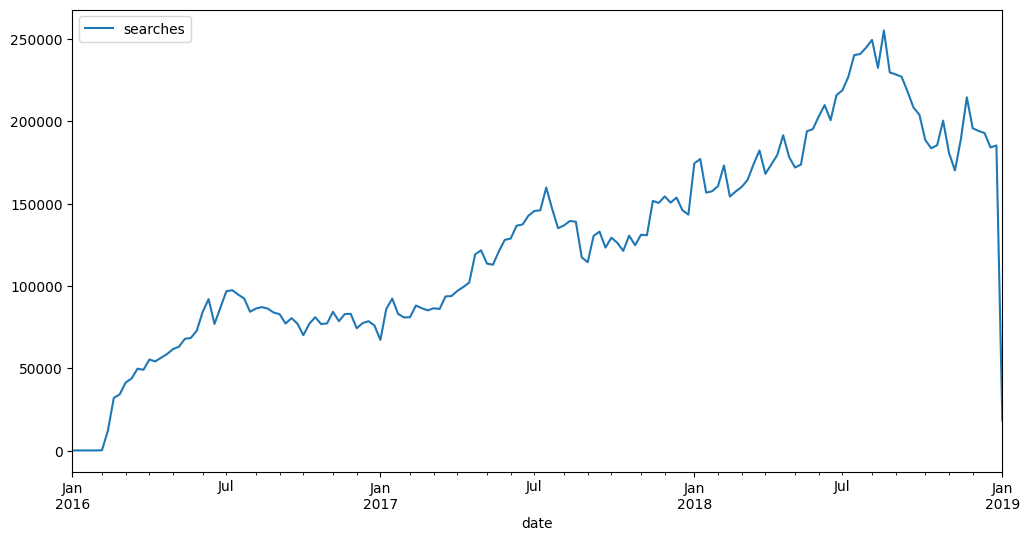

In [24]:
data_sample_Android.plot(figsize=(12,6))

In [25]:
data_sample_Android = data_sample_Android['2016-02-21':'2018-12-23']

<AxesSubplot: xlabel='date'>

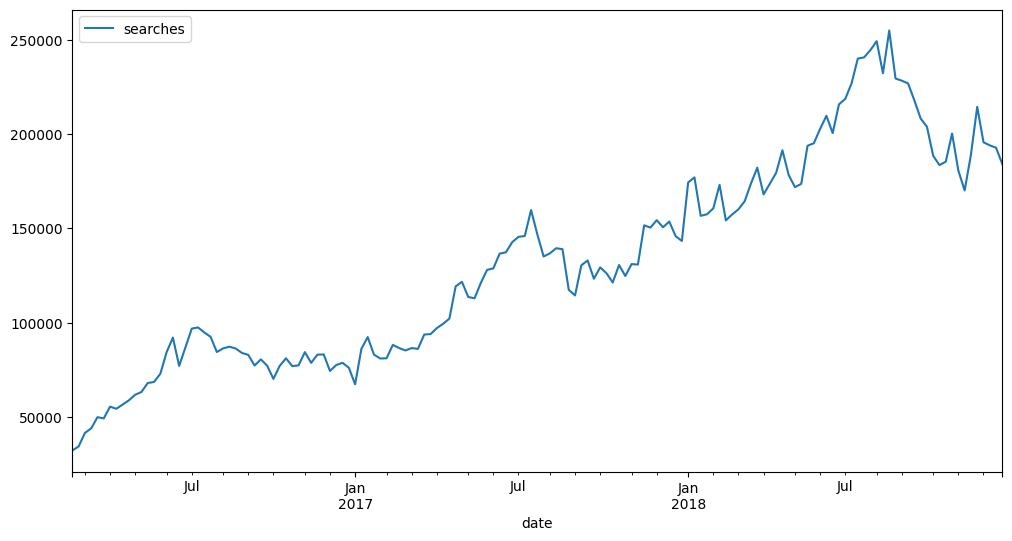

In [26]:
data_sample_Android.plot(figsize=(12,6))

In [27]:
data_sample_Android1diff = data_sample_Android.diff(periods=1).dropna()

In [28]:
data_sample_Android1diff

,searches
date,
2016-02-28,2162.0
2016-03-06,7185.0
2016-03-13,2435.0
2016-03-20,5932.0
2016-03-27,-652.0
...,...
2018-11-25,25425.0
2018-12-02,-18819.0
2018-12-09,-1644.0


,searches
count,149.000000
mean,131734.355705
std,54873.965880
min,31992.000000
25%,84230.000000
50%,129347.000000
75%,173951.000000
max,255215.000000


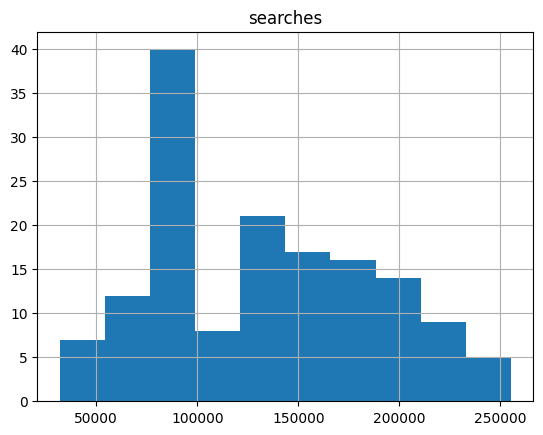

In [29]:
itog = data_sample_Android.describe()
data_sample_Android.hist()
itog

In [30]:
test = sm.tsa.adfuller(data_sample_Android1diff)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -4.050959733534224
p-value:  0.001165963511542088
Critical values:  {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}
единичных корней нет, ряд стационарен


In [31]:
m = data_sample_Android1diff.index[len(data_sample_Android1diff.index)//2+1]
r1 = sm.stats.DescrStatsW(data_sample_Android1diff[m:])
r2 = sm.stats.DescrStatsW(data_sample_Android1diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  [0.64008559]


In [32]:
data_sample_Android1diff.index[len(data_sample_Android1diff.index)//2+1]

Timestamp('2017-08-06 00:00:00', freq='W-SUN')

<AxesSubplot: xlabel='date'>

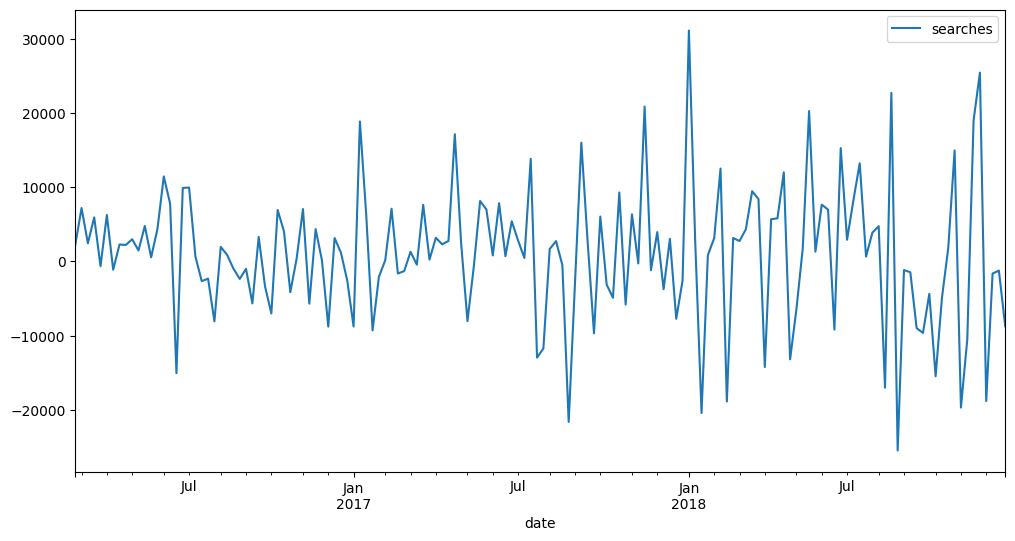

In [33]:
data_sample_Android1diff.plot(figsize=(12,6))

/Users/viktoriagolovneva/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


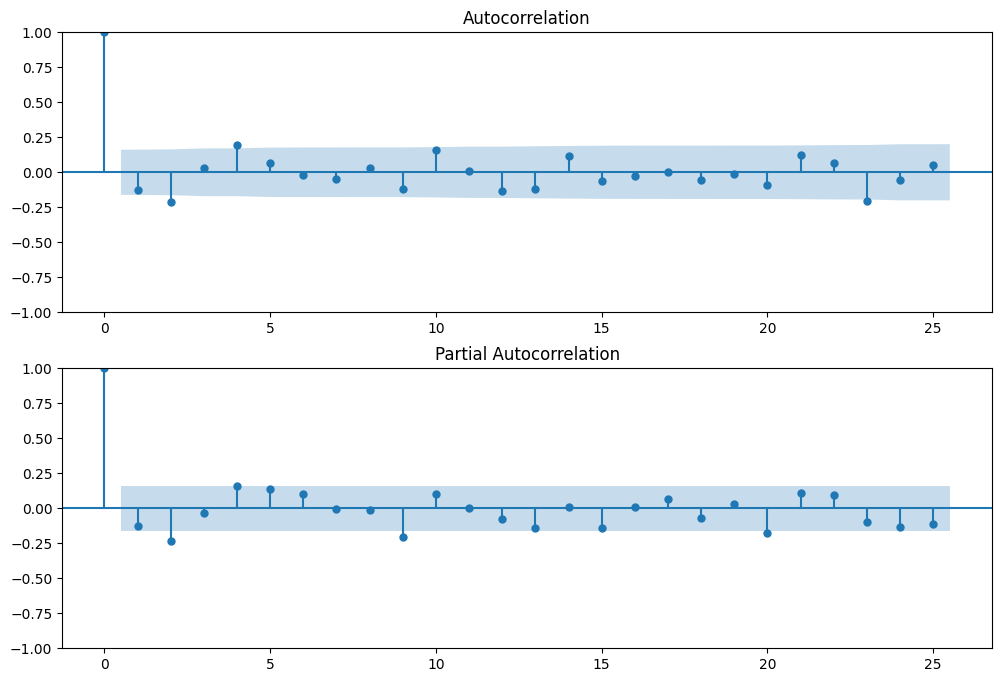

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_sample_Android1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_sample_Android1diff, lags=25, ax=ax2)

In [35]:
src_data_model = data_sample_Android[:'2018-12-01']

In [36]:
model = sm.tsa.ARIMA(src_data_model, order=(1,2,4), freq='W').fit()

In [37]:
print (model.summary())

                               SARIMAX Results                                
Dep. Variable:               searches   No. Observations:                  145
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -1508.681
Date:                Sat, 17 Dec 2022   AIC                           3029.361
Time:                        21:39:39   BIC                           3047.138
Sample:                    02-21-2016   HQIC                          3036.585
                         - 11-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9222      0.147     -6.284      0.000      -1.210      -0.635
ma.L1         -0.0819      0.147     -0.557      0.578      -0.370       0.206
ma.L2         -0.9517      0.146     -6.505      0.0

In [38]:
pred = model.predict('2019-01-07','2019-12-31', typ='levels')

<AxesSubplot: xlabel='date'>

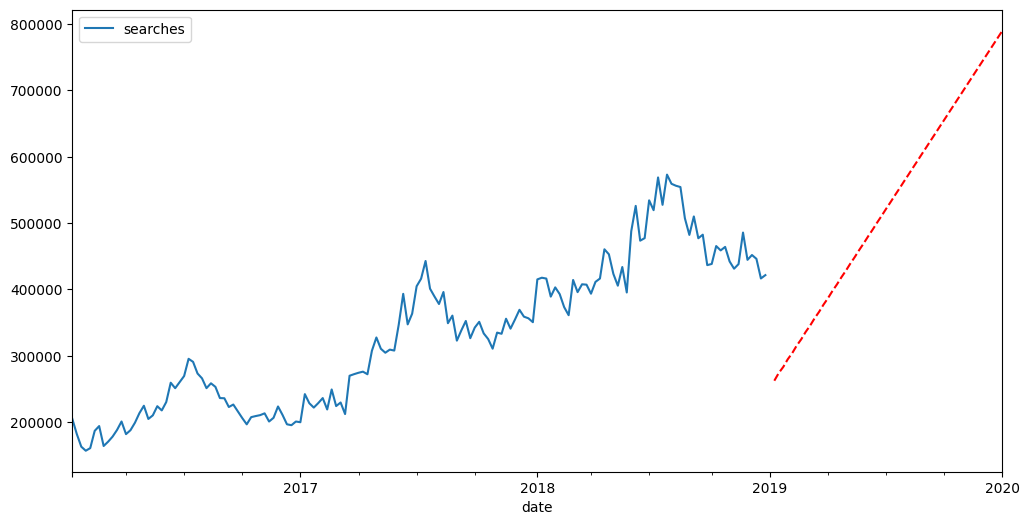

In [39]:
data_sample_iOS.plot(figsize=(12,6))
pred.plot(style='r--')

# mobile_web анализ

In [40]:
data_sample_mobile_web = data_sample_2[data_sample_2["host"] == 'mobile_web']

<AxesSubplot: xlabel='date'>

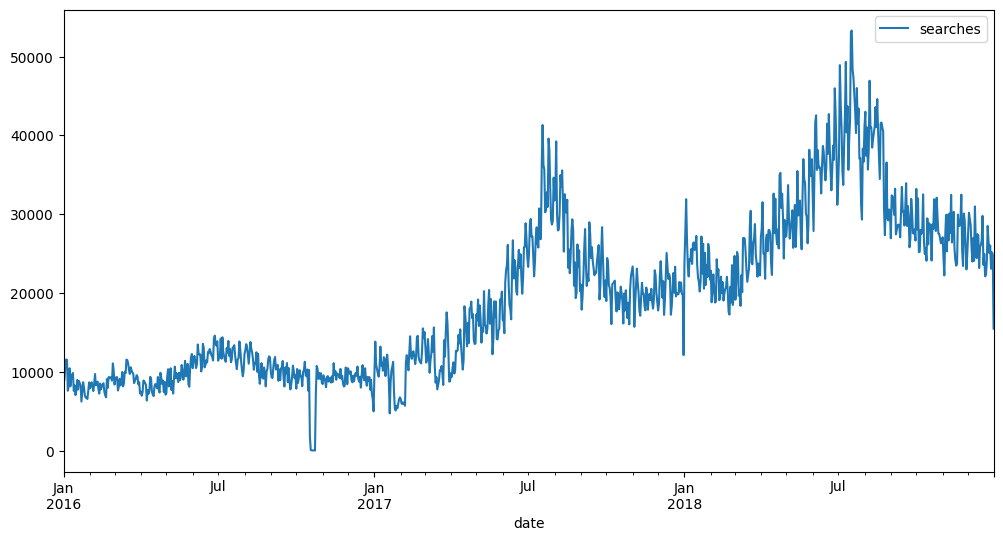

In [41]:
data_sample_mobile_web.plot(figsize=(12,6))

In [42]:
data_sample_mobile_web = data_sample_mobile_web.resample('W').sum()

/var/folders/bh/08qpbz1j24sfjf29hzvdnyq80000gn/T/ipykernel_61927/2632848511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_mobile_web = data_sample_mobile_web.resample('W').sum()


<AxesSubplot: xlabel='date'>

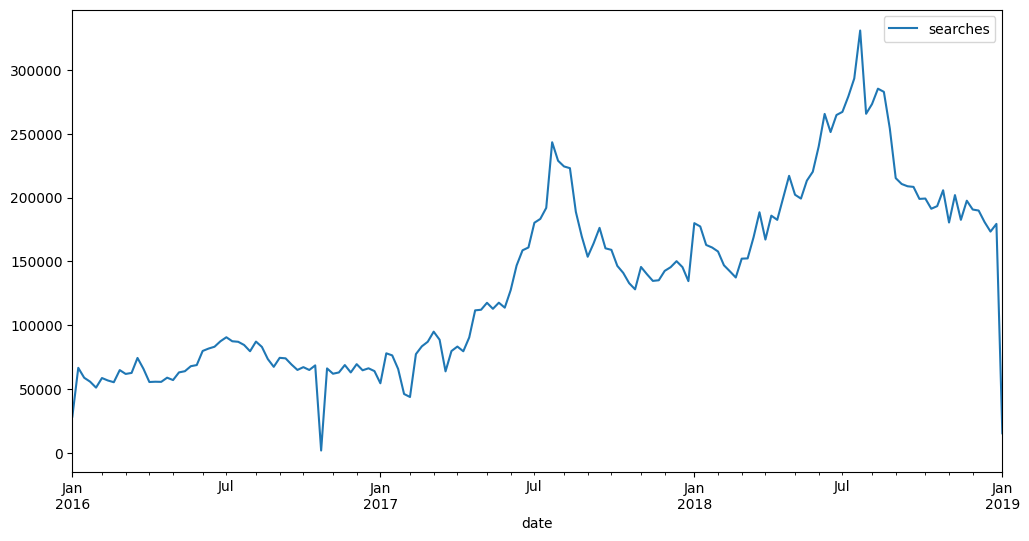

In [43]:
data_sample_mobile_web.plot(figsize=(12,6))

In [44]:
data_sample_mobile_web = data_sample_mobile_web['2016-02-21':'2018-12-23']

<AxesSubplot: xlabel='date'>

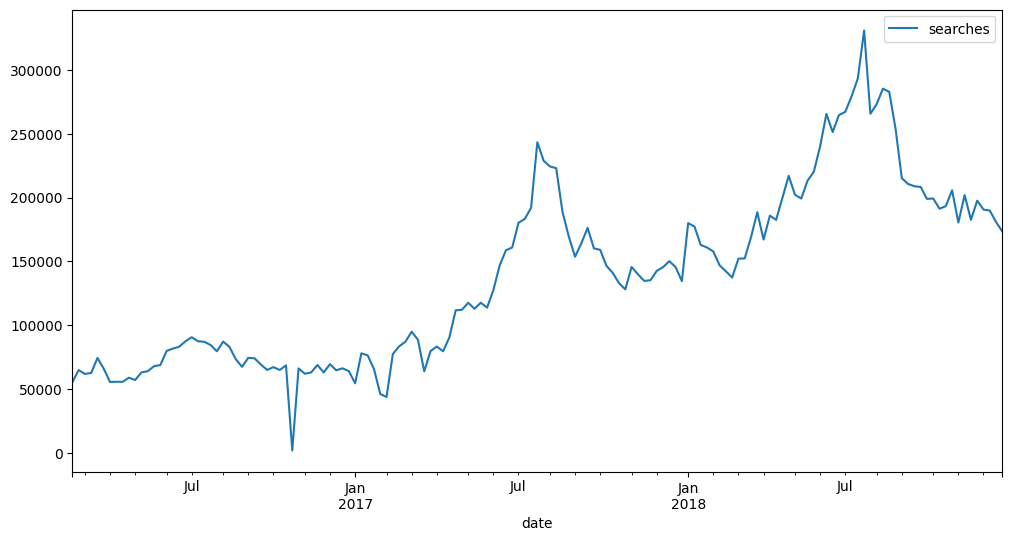

In [45]:
data_sample_mobile_web.plot(figsize=(12,6))

In [46]:
data_sample_mobile_web1diff = data_sample_mobile_web.diff(periods=1).dropna()

In [47]:
data_sample_mobile_web1diff

,searches
date,
2016-02-28,9492.0
2016-03-06,-3002.0
2016-03-13,793.0
2016-03-20,11723.0
2016-03-27,-8467.0
...,...
2018-11-25,14963.0
2018-12-02,-6918.0
2018-12-09,-783.0


,searches
count,149.000000
mean,138366.744966
std,68487.565220
min,1986.000000
25%,74442.000000
50%,139980.000000
75%,188786.000000
max,330696.000000


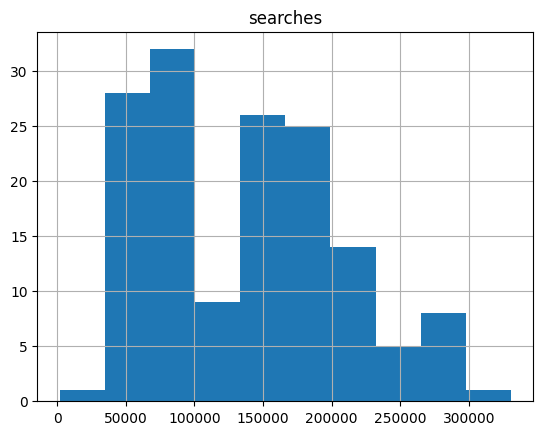

In [48]:
itog = data_sample_mobile_web.describe()
data_sample_mobile_web.hist()
itog

In [49]:
test = sm.tsa.adfuller(data_sample_mobile_web1diff)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -14.445069974048371
p-value:  7.252362499149463e-27
Critical values:  {'1%': -3.4756368462466662, '5%': -2.8814104466172608, '10%': -2.5773652982553568}
единичных корней нет, ряд стационарен


In [50]:
m = data_sample_mobile_web1diff.index[len(data_sample_mobile_web1diff.index)//2+1]
r1 = sm.stats.DescrStatsW(data_sample_mobile_web1diff[m:])
r2 = sm.stats.DescrStatsW(data_sample_mobile_web1diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  [0.25898495]


In [51]:
data_sample_mobile_web1diff.index[len(data_sample_mobile_web1diff.index)//2+1]

Timestamp('2017-08-06 00:00:00', freq='W-SUN')

<AxesSubplot: xlabel='date'>

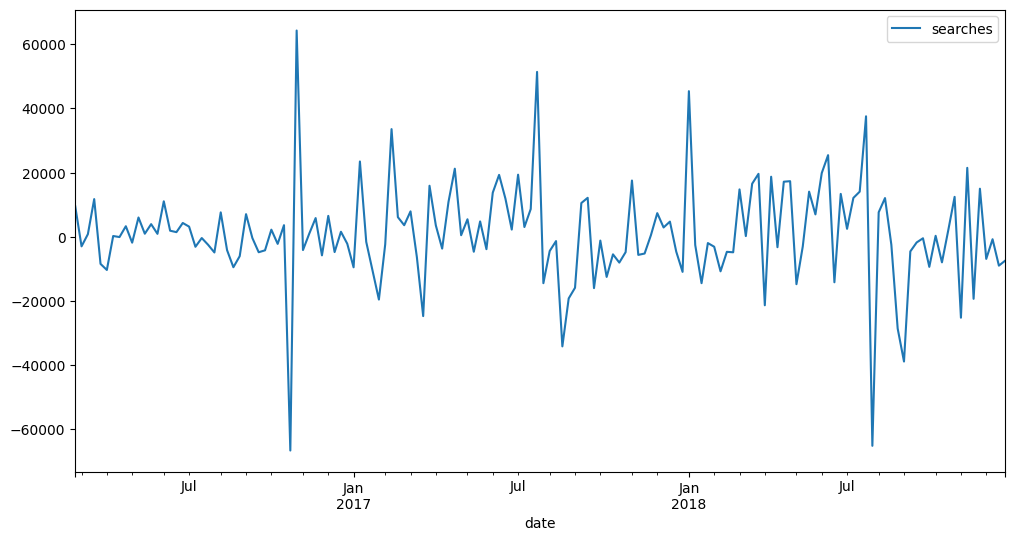

In [52]:
data_sample_mobile_web1diff.plot(figsize=(12,6))

/Users/viktoriagolovneva/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


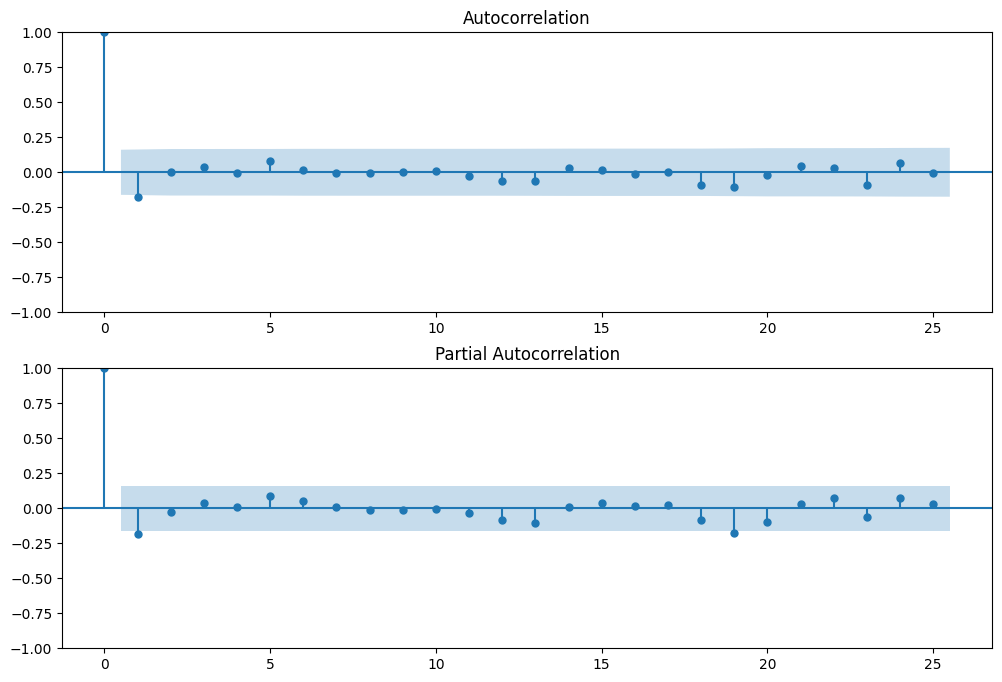

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_sample_mobile_web1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_sample_mobile_web1diff, lags=25, ax=ax2)

In [54]:
src_data_model = data_sample_mobile_web[:'2018-12-01']

In [55]:
model = sm.tsa.ARIMA(src_data_model, order=(1,3,1), freq='W').fit()

print (model.summary())

pred = model.predict('2019-01-07','2019-12-31', typ='levels')

                               SARIMAX Results                                
Dep. Variable:               searches   No. Observations:                  145
Model:                 ARIMA(1, 3, 1)   Log Likelihood               -1613.205
Date:                Sat, 17 Dec 2022   AIC                           3232.409
Time:                        21:39:40   BIC                           3241.276
Sample:                    02-21-2016   HQIC                          3236.012
                         - 11-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5781      0.053    -10.904      0.000      -0.682      -0.474
ma.L1         -1.0000      0.074    -13.563      0.000      -1.145      -0.855
sigma2      4.203e+08   1.75e-10    2.4e+18      0.0

<AxesSubplot: xlabel='date'>

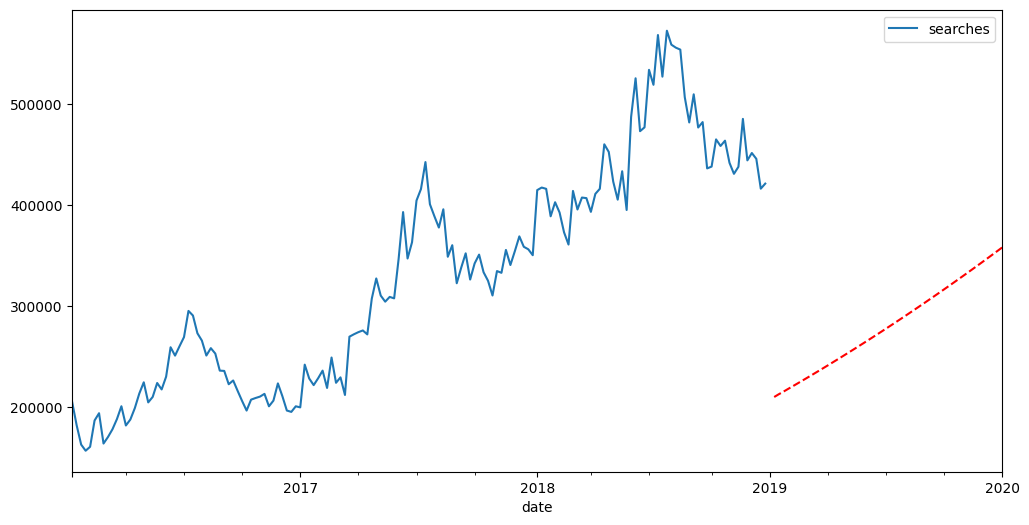

In [56]:
data_sample_iOS.plot(figsize=(12,6))
pred.plot(style='r--')